# Using the lmt-analysis library with Jupyter

We show here some basic examples of Live Mouse Tracker analysis.

Video demo and available databases: https://livemousetracker.org/
Paper : https://www.biorxiv.org/content/10.1101/345132v2
mail: chaumont@pasteur.fr, elodie.ey@pasteur.fr
Twitter : @fabdechaumont
Another tutorial of the this lib (slide presentation): https://docs.google.com/presentation/d/1wR7JM2vq5ZjugrwDe4YuuKJm0MWIvkHAvrOH7mQNOEk/edit?usp=sharing

How to use run this tutorial with your data:
1. Download or connect a git client to the lmt-analysis repository : https://github.com/fdechaumont/lmt-analysis
2. Download the demo database produced by Live Mouse Tracker: http://bioimageanalysis.org
3. Install anaconda, and run the jupyter notebook: https://www.anaconda.com/distribution/
4. Point your browser to this file (example/Examples with Jupyter)
/lmt/20180110_validation_4_ind_Experiment_6644.zip
5. Run
6. Select the database you just downloaded when asked.
7. Enjoy the results.

## Performs the imports:
* The only diffence with the original python code is the import that needs the following lines to work:
```python
import sys
sys.path.insert(1, "../")
```

In [6]:
'''
Created on 15 fev. 2019

@author: Fab
'''
%matplotlib inline

import sys
sys.path.insert(1, "../")


import pandas as pd
import numpy as np

import sqlite3
from lmtanalysis.FileUtil import getFilesToProcess

from lmtanalysis.Animal import AnimalPool
from lmtanalysis.Measure import *
from lmtanalysis.Event import EventTimeLine, plotMultipleTimeLine


## Ask file to process to the user with a dialog window:
* note: You can run this step only once, and then keep processing the file(s) with the next cells.
* note2: the file window can be hidden by other windows.

In [11]:
#ask the user for database to process
print( "Select file name in window")
files = getFilesToProcess()

Select file name in window


## Displays distance traveled in cm and use scatter plot style

In [3]:
    for file in files:
        
        # connect to database
        connection = sqlite3.connect( file )
        
        # create an animalPool, which basically contains your animals
        animalPool = AnimalPool()
        
        # load infos about the animals
        animalPool.loadAnimals( connection )
        
        # load all detection (positions) of all animals for the first hour
        animalPool.loadDetection( start = 0, end = 2*oneHour )
        
        # filter detection by area (in cm from the top left of the cage)
        animalPool.filterDetectionByArea( 0, 0, 50, 50 );
        
        # loop over all animals in this database
        for animal in animalPool.getAnimalList():
            
            # print RFID of animal
            print ( "Animal : " , animal.RFID )
            # distance traveled by animal (in cm):            
            print( "Distance traveled in area: (in centimeter): " , animal.getDistance( ) )
            
        #animalPool.plotTrajectory( title="Trajectories filtered by area" , scatter=True )
            
    
    

Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:2 Name:M0004 RFID:000004849468 Genotype:Shank2_KO User1:None
Animal Id:3 Name:M0005 RFID:000004849106 Genotype:Shank2_KO User1:None
Animal Id:1 Name:M0003 RFID:000004849259 Genotype:Shank2_WT User1:None
Animal Id:2 Name:M0004 RFID:000004849468 Genotype:Shank2_KO User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=216000
Animal Id:2 Name:M0004 RFID:000004849468 Genotype:Shank2_KO User1:None   190284  detections loaded in 1.9570164680480957 seconds.
Animal Id:3 Name:M0005 RFID:000004849106 Genotype:Shank2_KO User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FR

## Display trajectories of animals
* For this example we filter data from 0 to 1 hour
* Trajectories are plotted considering the kinect resolution.
    * 30 detections per second
    * 512x424 infra red sensor resolution

Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:T0010 RFID:000004849502 Genotype:TSC1_WT_SH User1:None
Animal Id:2 Name:T0011 RFID:000004849445 Genotype:TSC1_WT_SH User1:None
Animal Id:3 Name:T0012 RFID:000004849300 Genotype:TSC1_het_SH User1:None
Animal Id:1 Name:T0010 RFID:000004849502 Genotype:TSC1_WT_SH User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=90000 AND FRAMENUMBER<=108000
Animal Id:1 Name:T0010 RFID:000004849502 Genotype:TSC1_WT_SH User1:None   17604  detections loaded in 0.13002991676330566 seconds.
Animal Id:2 Name:T0011 RFID:000004849445 Genotype:TSC1_WT_SH User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,L

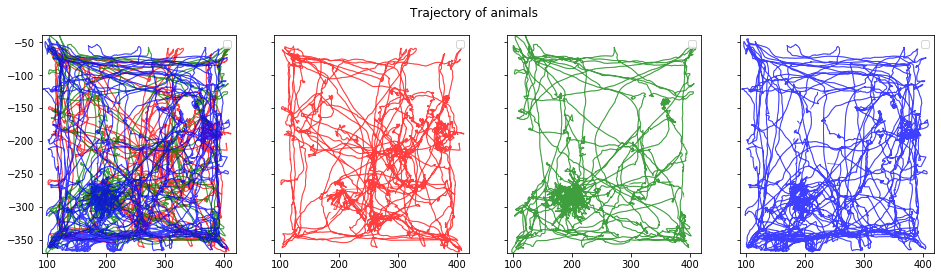

In [12]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )
    

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 50*oneMinute, end= 60*oneMinute )

    # plot and show trajectory
    animalPool.plotTrajectory()
    #fig.savefig('filename.eps', format='eps')
    

## Filter trajectories : keep tracks which are slower than 2cm/s

In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = oneHour, end = 2*oneHour )

    # filter detection by animalSpeed (speed is in centimeters per second)
    animalPool.filterDetectionByInstantSpeed( 100, 10000)

    # plot and show trajectory
    animalPool.plotTrajectory( title="Trajectories filtered by speed (max 2) ")

## Get time spent in area
* In this example we only keep the area where the house has been placed
* Numbers on the graph is the RFID number of the animal

In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = 10*oneMinute )

    # filter detection by area (in cm from the top left of the cage)
    animalPool.filterDetectionByArea( 0, 30, 25, 50 );

    # loop over all animals in this database
    for animal in animalPool.getAnimalList():

        # print RFID of animal
        print ( "Animal : " , animal.RFID )
        # number of frame in which the animal has been detected:
        numberOfFrame = len ( animal.detectionDictionnary.keys() )
        # we have 30 frames per second
        timeInSecond = numberOfFrame / 30
        # print result
        print( "Time spent in area: (in second): " , timeInSecond )

    animalPool.plotTrajectory( title="Trajectories filtered by area" , scatter=True )




## 3D rendering of the trajectory

In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = 10*oneMinute )

    # filter detection by area (in cm from the top left of the cage)
    animalPool.filterDetectionByArea( 0, 30, 25, 50 );

    # loop over all animals in this database
    for animal in animalPool.getAnimalList():

        animal.plotTrajectory3D()

            
        
            
    
    

## Show event timeline
* In this example, we show the time line for the event "Oral-genital contact" for the first our of experiment
* Note that time line can be very dense and may not be displayed correctly. Consider saving them as PDF and then open it in a reader to get the proper display.

In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = oneHour )

    eventTimeLine = EventTimeLine( connection, "Oral-genital Contact", minFrame = 0, maxFrame = oneHour )
    
    eventTimeLine.plotTimeLine()
        

## Show multiple timeline with id


In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = oneHour )

    eventTimeLine1 = EventTimeLine( connection, "Oral-genital Contact", idA = 1, idB = 2, minFrame = 0, maxFrame = oneHour )        
    eventTimeLine2 = EventTimeLine( connection, "Oral-genital Contact", idA = 2, idB = 1, minFrame = 0, maxFrame = oneHour )

    plotMultipleTimeLine( [ eventTimeLine1, eventTimeLine2 ] )


## Show timeline with all different id combinaison
* In this experiment we have 4 animals
* This script will show all animal combinations for this time line.

In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = oneHour )

    eventTimeLineList = []
    for a in animalPool.getAnimalDictionnary():
        for b in animalPool.getAnimalDictionnary():
            if a == b:
                continue
            eventTimeLine = EventTimeLine( connection, "Oral-genital Contact", idA = a, idB = b, minFrame = 0, maxFrame = oneHour )
            eventTimeLineList.append( eventTimeLine )        

    plotMultipleTimeLine( eventTimeLineList )


## Number and duration of events

In this example we extract the duration of the events, and we display them with pandas.

In [ ]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = oneHour )

    eventTimeLine = EventTimeLine( connection, "Oral-genital Contact", idA = 1 , idB = 2, minFrame = 0, maxFrame = oneHour )

    print ( "Event list for label ", eventTimeLine.eventNameWithId )
    print ( "for animal 1:", animalPool.getAnimalDictionnary()[1].RFID )
    print ( "for animal 2:", animalPool.getAnimalDictionnary()[2].RFID )
    print ( "Number of events:", len( eventTimeLine.getEventList() ) )

    import pandas as pd
    
    #df = pd.DataFrame( columns=( "Start frame","End frame", "Duration (in frame)" )
    #print ( "start frame","end frame", "duration(in frame)")        
    
    data = []
    
    for event in eventTimeLine.eventList:
        data.append( [ event.startFrame, event.endFrame, event.duration() ] )
        #print( event.startFrame, event.endFrame, event.duration() )

import pandas as pd
import numpy as np

df = pd.DataFrame( data = np.array( data ), columns=[ "Start frame","End frame", "Duration (in frame)" ] )

df                      

## Show the mask of the animal at t=300

This code grabs the data from the *data* field of the detection table. It unzip the mask used as region of interest to display it in a figure, so that you can see the silhouette of the animals

Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:A RFID:000004808973 Genotype:None User1:None
Animal Id:2 Name:B RFID:000004808974 Genotype:None User1:None
Animal Id:3 Name:C RFID:000004809106 Genotype:None User1:None


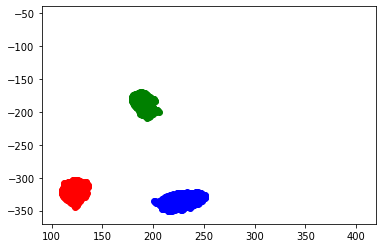

In [38]:
for file in files:

    animalPool = AnimalPool( )
    animalPool.loadAnimals( connection )
    
    # show the mask of animals at frame 300
    animalPool.showMask( 63900)
                       


# Show (x,y,z) position of the first animal
For the purpose of the example and for the limit the output size, we take the first file, and we process the first animal

In [ ]:
file = files[0]
    
# connect to database
connection = sqlite3.connect( file )

# create an animalPool, which basically contains your animals
animalPool = AnimalPool()

animalPool.loadAnimals( connection )

# load all detection (positions) of all animals for the first hour
animalPool.loadDetection( start = 0, end = oneHour )

animal = animalPool.animalDictionnary[1]

print ("******")
print ( animal )

print ("Position coordinates:")

data = []

for detectionKey in animal.detectionDictionnary:
    detection = animal.detectionDictionnary[ detectionKey ]
    t = detectionKey
    x = detection.massX
    y = detection.massY
    z = detection.massZ
    data.append( [ t,x,y,z ] )

df = pd.DataFrame( data = np.array( data ), columns=[ "frame number", "x","y","z" ] )

df 